In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Read the data 

In [2]:
# Importing cookies.csv
df = pd.read_csv('cookies.csv')

In [3]:
# taking a look at the content of the dataframe
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


### Exploratory Data Analysis and Descriptive Statistics

In [4]:
# exploring data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [5]:
# Checking null values
df.isnull().sum()*100/len(df)

sugar to flour ratio    0.000000
sugar index             0.096191
bake temp               0.000000
chill time              0.000000
calories                0.000000
density                 0.000000
pH                      0.000000
grams baking soda       0.000000
bake time               0.192382
quality                 0.000000
butter type             0.000000
weight                  0.000000
diameter                0.000000
mixins                  0.038476
crunch factor           0.000000
aesthetic appeal        0.000000
dtype: float64

In [6]:
# As the percentage of nulls is lower than 1%, I'll delete the rows containing nulls.
df= df.dropna()

In [7]:
df.shape

(5181, 16)

## Bake time 

In [8]:
df['bake time'].describe()

count    5181.000000
mean       10.495561
std         1.194958
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

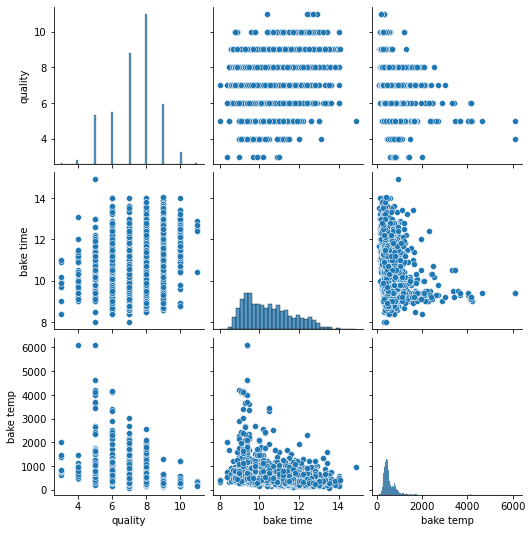

In [9]:
sns.pairplot(df[['quality', 'bake time', 'bake temp']]);

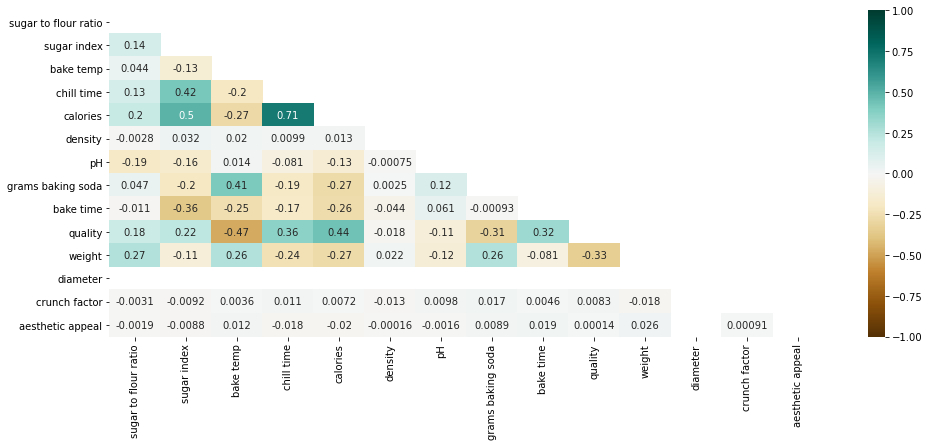

In [10]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [11]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', df['quality'].corr(df[column]))

sugar to flour ratio --> 0.17992898765039828
sugar index --> 0.21995856817996384
bake temp --> -0.470895323707292
chill time --> 0.3649248978298107
calories --> 0.4400803834300938
density --> -0.017523118224988726
pH --> -0.11372471128992226
grams baking soda --> -0.3062510398576623
bake time --> 0.315445216360322
quality --> 1.0
weight --> -0.3285339469570104
diameter --> nan
crunch factor --> 0.008345525940834769
aesthetic appeal --> 0.00014270685418785024


## butter type

In [12]:
df['butter type'].value_counts()

melted    3908
cubed     1273
Name: butter type, dtype: int64

## aesthetic appeal

In [13]:
df['aesthetic appeal'].value_counts()

3    5178
4       3
Name: aesthetic appeal, dtype: int64

Thoughts on aesthetics : 
    not many values - drop column 

## weight

In [14]:
df['weight'].describe()

count    5181.000000
mean       14.383922
std         3.027030
min       -99.000000
25%        12.800000
50%        14.000000
75%        15.400000
max        31.800000
Name: weight, dtype: float64

In [15]:
df['weight'].unique()

array([ 15.2,  12.4,   9.4,  12.2,  19.8,  13.2,  14.2,  13.8,  12.6,
        13. ,  12. ,  14.6,  15.6,  14. ,  13.4,  16.8,  14.8,  13.6,
        16. ,  11. ,  18.6,  10.6,  18.2,  15.8,  17.2,  14.3,  10.4,
        11.8,  11.6,  15.4,  21.6,  12.8,  20.2,  14.4,  12.3,  23.8,
        11.2,  11.4,  15. ,  19.6,  17.4,  16.4,  19.2,  10.8,  18. ,
        26. ,  16.6,  16.2,  19. ,  10. ,  21.4,  20.4,  17. ,  31.2,
        17.8,  22.6,   9.8,  23. ,  18.8,  26.6,  20.8,  26.4,  10.2,
        22.2,  23.4,  18.4,  17.6,  28.4,  24.6,  20.6,  25. ,  24.2,
        22.8,  24. ,  23.2,  24.4,  26.8,  22.4,  19.4,  23.6,  27.4,
        28. ,  22. ,  21.8,  25.2,  25.8,  20. ,  21.2,  21. , -99. ,
        25.6,  31. ,   9. ,  24.8,  25.4,   9.6,   8.8,  30. ,  12.9,
         9.2,  31.8,   7.6,   7.8,   8.4,  28.6])

Thoughts on weight : 

    Remove -99 value

## diameter

In [16]:
df['diameter'].unique()

array([7])

Thoughts on diameter : 

    All equal to 7 - column can be dropped 

## bake time

In [17]:
df['bake time'].describe()

count    5181.000000
mean       10.495561
std         1.194958
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

In [18]:
df[df['bake time'].isnull()]['quality']

Series([], Name: quality, dtype: int64)

Thoughts on Bake time 

    judging by the spread of nulls across quality bands, any missing values could be replaced by mean or rows dropped 

## crunch factor

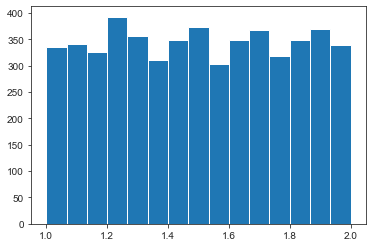

In [19]:
sns.set_style("ticks")
plt.hist(df['crunch factor'], bins=15);

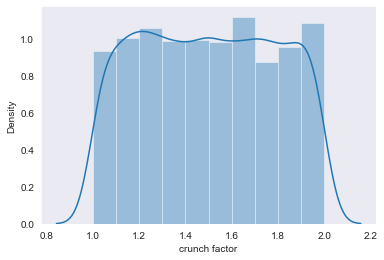

In [20]:
sns.set_style("dark")
m1 = sns.distplot(df['crunch factor'], bins=10)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5181 non-null   float64
 1   sugar index           5181 non-null   float64
 2   bake temp             5181 non-null   int64  
 3   chill time            5181 non-null   float64
 4   calories              5181 non-null   float64
 5   density               5181 non-null   float64
 6   pH                    5181 non-null   float64
 7   grams baking soda     5181 non-null   float64
 8   bake time             5181 non-null   float64
 9   quality               5181 non-null   int64  
 10  butter type           5181 non-null   object 
 11  weight                5181 non-null   float64
 12  diameter              5181 non-null   int64  
 13  mixins                5181 non-null   object 
 14  crunch factor         5181 non-null   float64
 15  aesthetic appeal     

## mixins

In [22]:
df['mixins']

0                     raisins
1                     raisins
2             nuts, chocolate
3                   chocolate
4       nuts, oats, chocolate
                ...          
5193            peanut butter
5194                  raisins
5195          chocolate, oats
5196                chocolate
5197                chocolate
Name: mixins, Length: 5181, dtype: object

In [23]:
df['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', 'peanut butter, raisins', 'oats'], dtype=object)

In [24]:
df['mixins'].nunique()

13

In [25]:
df['mixins'].value_counts()

chocolate                         1892
raisins                           1196
chocolate, oats                    745
nuts, chocolate                    519
nuts,raisins                       331
nuts, oats, chocolate              293
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

### Wrangling the data / making small changes 

In [26]:
len(df.columns)

16

In [27]:
df.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [28]:
#remove -99
df = df.drop(df[df['weight'] == -99].index)

In [29]:
len(df.columns)

14

In [30]:
df=df.dropna(subset=['mixins'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 0 to 5197
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5180 non-null   float64
 1   sugar index           5180 non-null   float64
 2   bake temp             5180 non-null   int64  
 3   chill time            5180 non-null   float64
 4   calories              5180 non-null   float64
 5   density               5180 non-null   float64
 6   pH                    5180 non-null   float64
 7   grams baking soda     5180 non-null   float64
 8   bake time             5180 non-null   float64
 9   quality               5180 non-null   int64  
 10  butter type           5180 non-null   object 
 11  weight                5180 non-null   float64
 12  mixins                5180 non-null   object 
 13  crunch factor         5180 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 607.0+ KB


In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
df['chocolate'] = 0
df['raisins'] = 0
df['oats'] = 0
df['nuts'] = 0
df['peanut butter'] = 0

In [34]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,0,0,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,0,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,0,0,0,0,0


In [35]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(df)):
        if mix in [x.strip() for x in df.loc[i, 'mixins'].split(',')]:
            df.loc[i, mix] = 1

In [36]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,0,1,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,0,1,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,1,0,0,1,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,1,0,1,1,0


In [37]:
df.drop(columns=["mixins"], inplace=True)

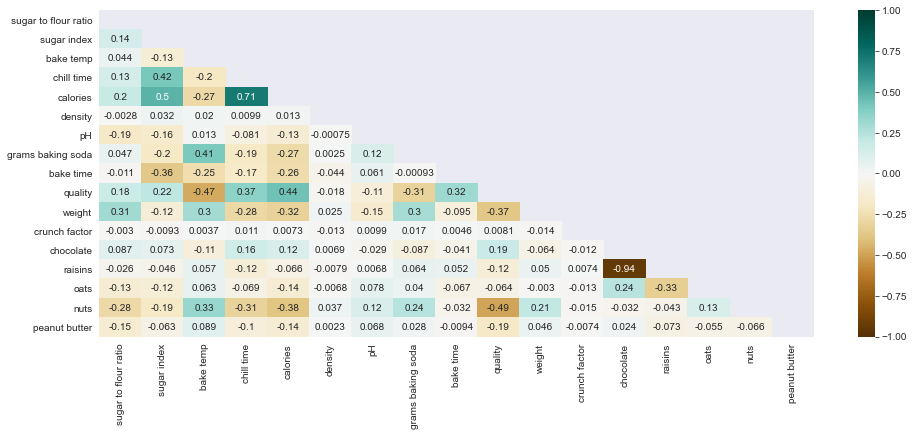

In [38]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

### pre processing- drop NANs and deal with non numerical data


In [39]:
df.dtypes

sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
crunch factor           float64
chocolate                 int64
raisins                   int64
oats                      int64
nuts                      int64
peanut butter             int64
dtype: object

In [40]:
df=pd.get_dummies(df, columns=['butter type'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5180 non-null   float64
 1   sugar index           5180 non-null   float64
 2   bake temp             5180 non-null   int64  
 3   chill time            5180 non-null   float64
 4   calories              5180 non-null   float64
 5   density               5180 non-null   float64
 6   pH                    5180 non-null   float64
 7   grams baking soda     5180 non-null   float64
 8   bake time             5180 non-null   float64
 9   quality               5180 non-null   int64  
 10  weight                5180 non-null   float64
 11  crunch factor         5180 non-null   float64
 12  chocolate             5180 non-null   int64  
 13  raisins               5180 non-null   int64  
 14  oats                  5180 non-null   int64  
 15  nuts                 

In [42]:
df = df.dropna()

In [43]:
df.reset_index(drop=True, inplace=True)

### Split data into dependent and independent variables 

In [44]:
X= df.drop(columns="quality")
y=df.quality

### Preprocessing - scaling 

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Train test split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

### get model, fit, make predictions  AND evaluate

In [47]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [49]:
y_preds  = lm.predict(X_test)

In [50]:
y_preds

array([7.66013667, 7.82612177, 8.6221728 , ..., 8.4027209 , 7.25690791,
       8.2478747 ])

In [51]:
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.6458913148801371
MAE: 0.5793221761789332
MSE: 0.5671998985426202


In [52]:
import math 
rmse = math.sqrt(mean_squared_error(y_test, y_preds))
print(rmse)

0.753126747993072


### Make predictions on the cookies_validate dataset (without labels)

In [53]:
cookies_val = pd.read_csv('cookies_validate.csv')

In [54]:
cookies_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    779 non-null    int64  
 1   sugar to flour ratio  779 non-null    float64
 2   sugar index           779 non-null    float64
 3   bake temp             779 non-null    float64
 4   chill time            779 non-null    float64
 5   calories              779 non-null    float64
 6   density               779 non-null    float64
 7   pH                    779 non-null    float64
 8   grams baking soda     779 non-null    float64
 9   bake time             779 non-null    float64
 10  quality               779 non-null    int64  
 11  butter type           779 non-null    object 
 12  weight                779 non-null    float64
 13  diameter              779 non-null    int64  
 14  mixins                779 non-null    object 
 15  crunch factor         7

In [55]:
cookies_val.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [56]:
cookies_val['chocolate'] = 0
cookies_val['raisins'] = 0
cookies_val['oats'] = 0
cookies_val['nuts'] = 0
cookies_val['peanut butter'] = 0

In [57]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies_val)):
        if mix in [x.strip() for x in cookies_val.loc[i, 'mixins'].split(',')]:
            cookies_val.loc[i, mix] = 1
            
cookies_val.drop(columns=["mixins"], inplace=True)

In [58]:
cookies_val.drop(columns= 'id', inplace=True)

In [59]:
cookies_val=pd.get_dummies(cookies_val, columns=['butter type'])

In [60]:
cookies_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  779 non-null    float64
 1   sugar index           779 non-null    float64
 2   bake temp             779 non-null    float64
 3   chill time            779 non-null    float64
 4   calories              779 non-null    float64
 5   density               779 non-null    float64
 6   pH                    779 non-null    float64
 7   grams baking soda     779 non-null    float64
 8   bake time             779 non-null    float64
 9   quality               779 non-null    int64  
 10  weight                779 non-null    float64
 11  crunch factor         779 non-null    float64
 12  chocolate             779 non-null    int64  
 13  raisins               779 non-null    int64  
 14  oats                  779 non-null    int64  
 15  nuts                  7

In [61]:
X_val = cookies_val.drop(columns="quality")

In [62]:
X_val_scaled = scaler.fit_transform(X_val)

In [63]:
predictions_val=lm.predict(X_val_scaled)

In [64]:
predictions_val

array([7.4384112 , 7.30083796, 7.48278376, 7.72783991, 7.21337458,
       7.16881892, 7.48746821, 7.10062739, 7.69597956, 7.3107104 ,
       7.43253657, 7.35233637, 7.4369311 , 7.63616511, 7.90853449,
       7.15529963, 7.52462336, 7.11580988, 8.24450251, 7.94005915,
       7.58190486, 7.59453913, 8.01586482, 7.67744013, 6.91346308,
       6.92553278, 7.00936457, 7.44593379, 6.9064593 , 7.26232478,
       7.61481806, 7.87470576, 7.40798518, 7.47079035, 7.76732966,
       7.85308405, 7.8544726 , 7.72332331, 7.10650202, 7.42254206,
       7.92519709, 7.63369319, 7.47867915, 7.12482783, 7.43468806,
       7.31180903, 7.15769526, 7.85657832, 7.53422114, 7.13781306,
       7.0888476 , 7.04542109, 7.36048457, 7.16183039, 7.03318354,
       7.9411883 , 7.27985713, 7.33674189, 7.91248652, 8.02175471,
       7.13987299, 7.47837397, 6.76980158, 7.59763667, 7.48496577,
       7.34002253, 7.4533343 , 7.27607295, 7.01275202, 8.17301508,
       7.86846491, 8.18694636, 7.13892695, 6.83790156, 7.73374

### assess predictions against the test data (with labels)

In [65]:
cookies_test = pd.read_csv('cookies_test.csv')

In [66]:
y_real = cookies_test["quality"]

In [67]:
y_real.describe()

count    779.000000
mean       7.661104
std        1.093643
min        4.000000
25%        7.000000
50%        8.000000
75%        8.000000
max       10.000000
Name: quality, dtype: float64

In [68]:
mean_squared_error(y_real, predictions_val, squared = False)

0.9064320276234387

### Can we get more accuracy with an ensemble method?

#### Task 4 : Add a random forest regressor model to try to get a more accurate score. 

You can follow https://www.geeksforgeeks.org/random-forest-regression-in-python/
or the sklearn_documentation https://scikit-learn.org/stable/search.html?q=random+forest
to import the regressor and fit it to your data, before running the cells below which will calculate your new RMSE accuracy score


### <span style="color:#306998">Random Forest</span>
<span style="color:#306998">
A random forest is an ensemble machine learning technique — a random forest contains many decision trees that all work together to classify new points. When a random forest is asked to classify a new point, the random forest gives that point to each of the decision trees. Each of those trees reports their classification and the random forest returns the most popular classification. It’s like every tree gets a vote, and the most popular classification wins.<br>
Some of the trees in the random forest may be overfit, but by making the prediction based on a large number of trees, overfitting will have less of an impact.
</span>  

In [69]:
#Task 4 your code: 
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# Setup random seed
np.random.seed(42)

# Create the data
X= df.drop(columns="quality")
y=df.quality

# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# Instatiate Random Forest Regressor
# create regressor object
regressor = RandomForestRegressor(n_estimators=100)

In [70]:
# fit the regressor with X_train and y_train data
regressor.fit(X_train, y_train) 

RandomForestRegressor()

In [71]:
predictions_new = regressor.predict(X_test)

In [72]:
# Evaluate de Random Forest Regressor,
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0

regressor.score(X_test, y_test)

0.7400163799877966

In [73]:
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, predictions_new)}")
print(f"MAE: {mean_absolute_error(y_test, predictions_new)}")
print(f"MSE: {mean_squared_error(y_test, predictions_new)}")

Regression metrics on the test set
R2 score: 0.7400163799877966
MAE: 0.47749034749034747
MSE: 0.4164333976833977


In [74]:
#Mean absolute error (MAE)

#MAE is the average of the absolute differences between predictions and actual values.

#It gives you an idea of how wrong your models predictions are.



df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(20)

,actual values,predicted values,differences
584,7,7.660137,0.660137
1215,7,7.826122,0.826122
877,9,8.622173,-0.377827
4230,9,9.087627,0.087627
4159,5,5.790599,0.790599
4546,9,8.087902,-0.912098
2787,4,5.594921,1.594921
1744,5,5.003246,0.003246
4481,7,7.434581,0.434581
3801,8,7.712932,-0.287068


In [75]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.5793221761789332

In [76]:
#Mean squared error (MSE)

#MSE is the mean of the square of the errors between actual and predicted values.


In [77]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
584,7,7.660137,0.660137,0.435780
1215,7,7.826122,0.826122,0.682477
877,9,8.622173,-0.377827,0.142753
4230,9,9.087627,0.087627,0.007678
4159,5,5.790599,0.790599,0.625047


In [78]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.5671998985426202

In [79]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample

In [80]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
584,7,7.660137,0.660137,0.435780
1215,7,7.826122,0.826122,0.682477
877,9,8.622173,-0.377827,0.142753
4230,9,9.087627,0.087627,0.007678
4159,5,5.790599,0.790599,0.625047


In [81]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.5671998985426202

In [82]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
584,7,7.660137,0.660137,0.435780
1215,7,7.826122,0.826122,20.000000
877,9,8.622173,-0.377827,20.000000
4230,9,9.087627,0.087627,20.000000
4159,5,5.790599,0.790599,20.000000
...,...,...,...,...
283,7,7.036663,0.036663,0.001344
1740,8,8.585857,0.585857,0.343228
1717,7,8.402721,1.402721,1.967626
1454,8,7.256908,-0.743092,0.552186


In [83]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

2.435884341803385

### Evaluate random forest accuracy 

RMSE accuracy Score - depending on what you named your model and predictions this code may need to be adapted

ie if your model is called 'new model' and you have created a prediction from this model 'predictions_new' then edit the code block below as: 
    
    mean_squared_error(y_real, predictions_new, squared = False)
    

In [84]:
#EDIT as appropriate to get your RMSE 
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions_new, squared = False)

0.6453165096938073

**Evaluating a model using the scoring parameter**

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, X, y, cv=5)

array([0.78359239, 0.76041171, 0.73674938, 0.75922537, 0.76777694])

In [86]:
np.random.seed(42)

# Single training and test split score
regressor_single_score = regressor.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
regressor_cross_val_score = np.mean(cross_val_score(regressor, X, y, cv=5))

# Compare the two
regressor_single_score, regressor_cross_val_score

(0.7400163799877966, 0.7628822166889472)